In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

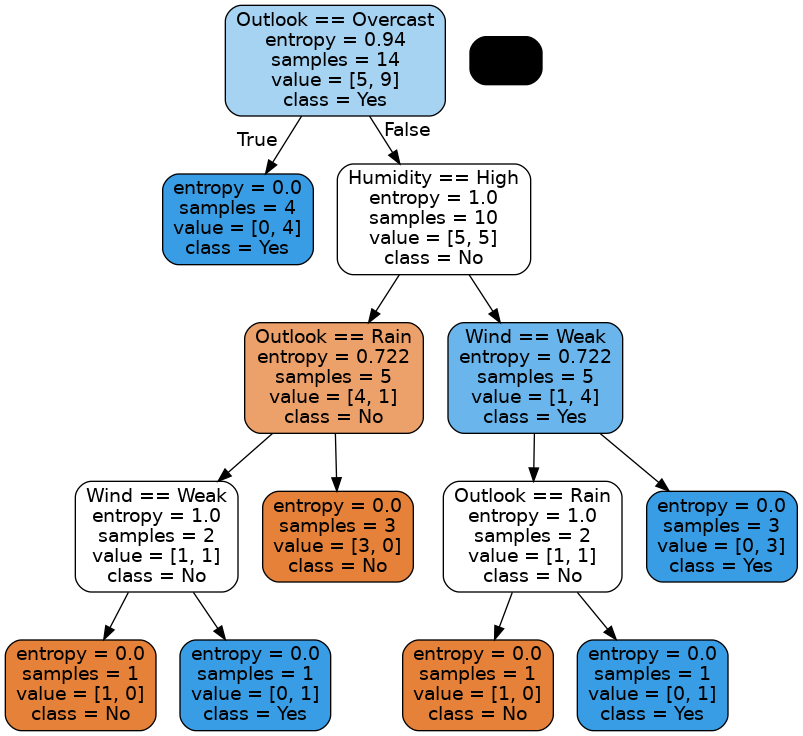

In [6]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('play_tennis/play_tennis_data.csv')
df.head()

# Encode categorical features
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Separate features and target variable
X = df_encoded.drop(columns="Play")
y = df_encoded["Play"]

# Train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# pass feature names to the `export_graphviz` function
feature_names = ['Outlook', 'Humidity', 'Wind']  # 3 features

# Mapping for categorical values
outlook_mapping = {0: "Overcast", 1: "Rain", 2: "Sunny"}
humidity_mapping = {0: "High", 1: "Normal"}
wind_mapping = {0: "Weak", 1: "Strong"}

# Export and modify the decision tree visualization
# Export as dot data
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=["No", "Yes"],
    rounded=True,
    filled=True,
)

# Replace numerical splits with actual feature names
dot_data = dot_data.replace('Outlook <= 0.5', 'Outlook == Overcast')
dot_data = dot_data.replace('Outlook <= 1.5', 'Outlook == Rain')
dot_data = dot_data.replace('Humidity <= 0.5', 'Humidity == High')
dot_data = dot_data.replace('Wind <= 0.5', 'Wind == Weak')

# Create and render the graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('custom_tree.png')
Image(filename='custom_tree.png')


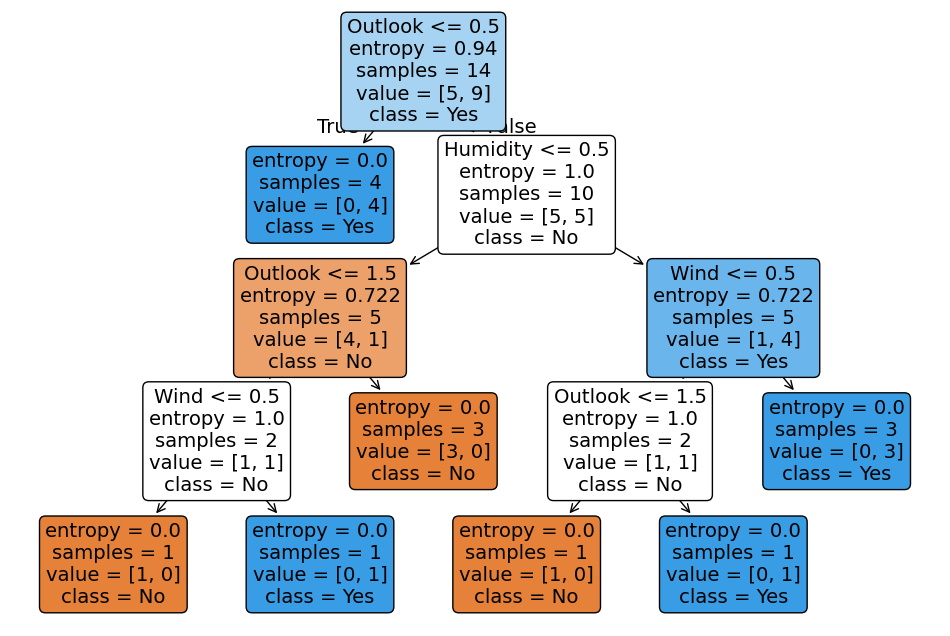

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
